In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Define the SIR model differential equations
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Parameters and initial conditions
N = 1000  # Total population
S0 = 999  # Initial susceptible population
I0 = 1    # Initial infected population
R0 = 0    # Initial recovered population
beta = 0.3e-3  # Transmission rate
gamma = 0.1    # Recovery rate
initial_conditions = [S0, I0, R0]

# Time grid for simulation (150 days)
t = np.linspace(0, 150, 150)

# Solve the differential equations using odeint
solution = odeint(sir_model, initial_conditions, t, args=(beta, gamma))
S, I, R = solution.T

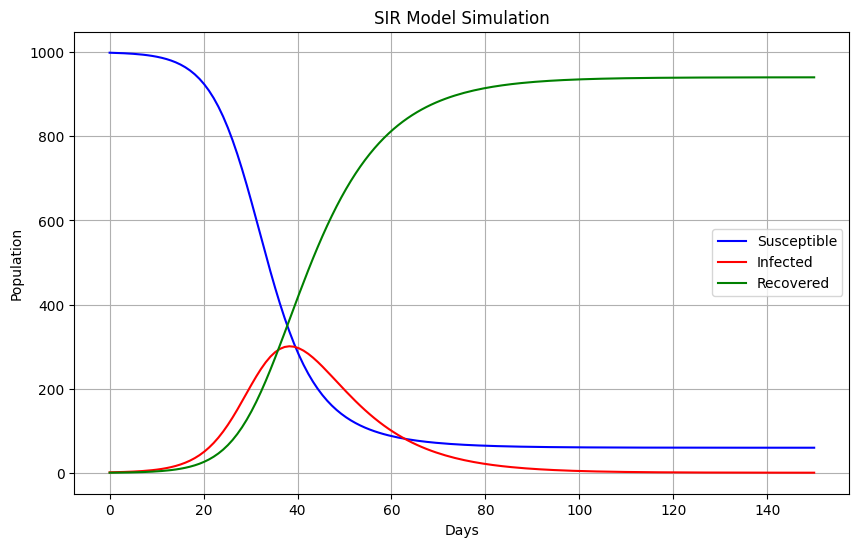

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid()
plt.show()

In [4]:
infection_peak_day = t[np.argmax(I)]
R0 = beta / gamma
print(f"Infection peak day: {infection_peak_day}")
print(f"Basic reproductive number R0: {R0}")

Infection peak day: 38.255033557046985
Basic reproductive number R0: 0.0029999999999999996


The infection peak is driven by the initial transmission rate (β) and the recovery rate (γ). As the susceptible population becomes exposed to the infection, the number of infections grows until the susceptible population significantly decreases. This reduction, along with ongoing recoveries, causes the infection count to eventually decline.

The Ro value is a measure of how many secondary infections one infected individual will cause in a fully susceptible population.
Influence on Pandemic Dynamics: A low Ro​ indicates that each infected individual is not likely to infect many others, leading to a faster containment of the infection. If Ro were greater than 1, the infection would spread more widely. In this case, a low Ro suggests effective infection control over time as the number of infections diminishes.

    Susceptible Population (S): The number of susceptible individuals decreases steadily over time as people become infected.
    Infected Population (I): The infected population grows initially, reaching a peak, and then declines as individuals recover or as fewer susceptible individuals are available for new infections.
    Recovered Population (R): The recovered population increases throughout the simulation, as individuals move from being infected to recovered. This accumulation of recovered individuals helps in containing the infection by reducing the pool of susceptible people.

This SIR model shows initial rapid spread, a peak in infection, and eventual containment as the population reaches immunity

SEIR Model with Births and Deaths

In [5]:
def seir_model(y, t, beta, gamma, sigma, mu, N):
    S, E, I, R = y
    dS_dt = mu * N - beta * S * I - mu * S
    dE_dt = beta * S * I - (sigma + mu) * E
    dI_dt = sigma * E - (gamma + mu) * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

new parameters

In [8]:
# Parameters and initial conditions for SEIR model
N = 1000   # Total population
S0 = 990   # Initial susceptible population
E0 = 9     # Initial exposed population
I0 = 1     # Initial infected population
R0 = 0     # Initial recovered population
beta = 0.3e-3  # Transmission rate
gamma = 0.1    # Recovery rate
sigma = 0.2    # Rate of becoming infectious
mu = 0.01      # Birth/death rate
initial_conditions = [S0, E0, I0, R0]

In [9]:
# Time grids for simulation (365 days and 1200 days)
t_365 = np.linspace(0, 365, 365)
t_1200 = np.linspace(0, 1200, 1200)

# Solve the differential equations using odeint for both time periods
solution_365 = odeint(seir_model, initial_conditions, t_365, args=(beta, gamma, sigma, mu, N))
solution_1200 = odeint(seir_model, initial_conditions, t_1200, args=(beta, gamma, sigma, mu, N))

# Extract results
S_365, E_365, I_365, R_365 = solution_365.T
S_1200, E_1200, I_1200, R_1200 = solution_1200.T

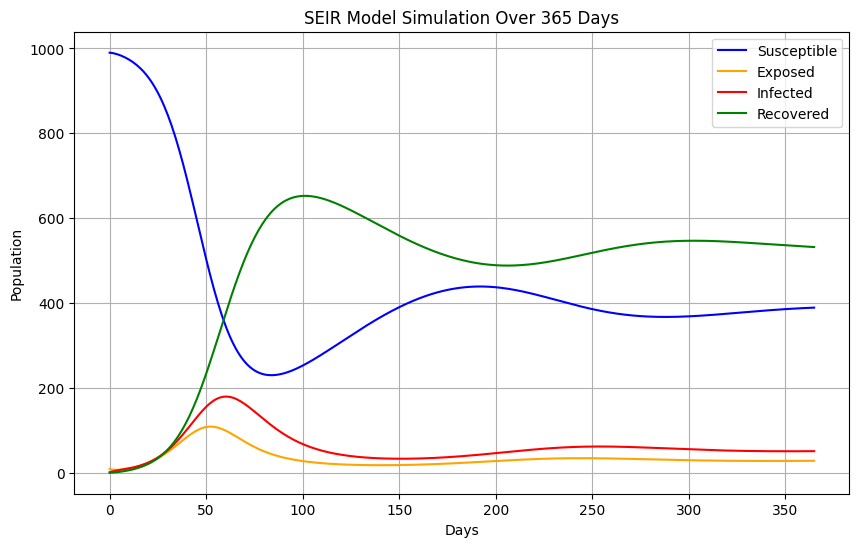

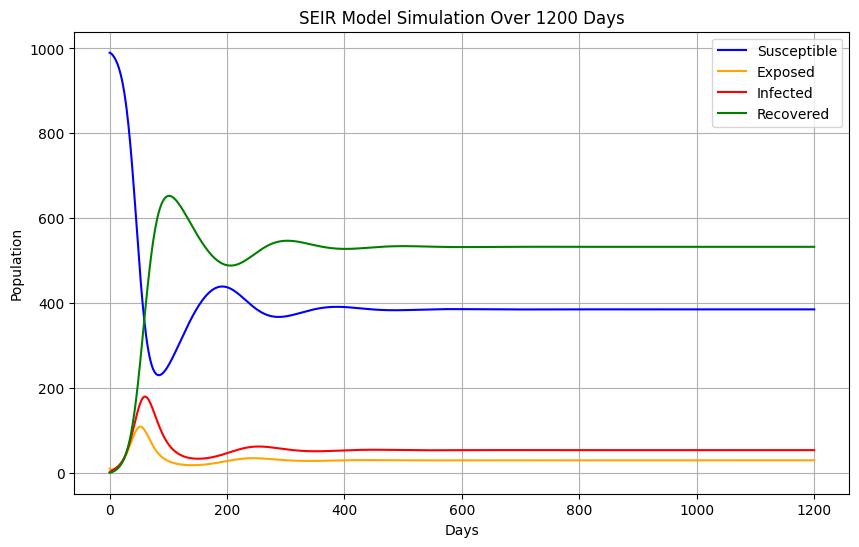

In [10]:
# Plot the results for 365 days
plt.figure(figsize=(10, 6))
plt.plot(t_365, S_365, label='Susceptible', color='blue')
plt.plot(t_365, E_365, label='Exposed', color='orange')
plt.plot(t_365, I_365, label='Infected', color='red')
plt.plot(t_365, R_365, label='Recovered', color='green')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Model Simulation Over 365 Days')
plt.legend()
plt.grid()
plt.show()

# Plot the results for 1200 days
plt.figure(figsize=(10, 6))
plt.plot(t_1200, S_1200, label='Susceptible', color='blue')
plt.plot(t_1200, E_1200, label='Exposed', color='orange')
plt.plot(t_1200, I_1200, label='Infected', color='red')
plt.plot(t_1200, R_1200, label='Recovered', color='green')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Model Simulation Over 1200 Days')
plt.legend()
plt.grid()
plt.show()

In the simulation over 1200 days, we observe that the infection waves vary, where the infected population (I) rises and falls in a cyclic pattern. This reflects recurring waves of infections, a pattern often seen in pandemics, where periods of increased infection are followed by declines as immunity builds in the population or interventions reduce spread. The periodic resurgence of infections may be influenced by the exposed compartment, which delays immediate transmission and contributes to oscillatory behavior.
iv. Effect of Exposed Compartment and Birth/Death Rates

    Exposed Compartment (E): The exposed group represents individuals who are infected but not yet infectious, introducing a delay between new infections and the appearance of infectious individuals. This delay impacts the dynamics by smoothing the rate of infection, often contributing to more gradual infection peaks rather than abrupt spikes.

    Birth/Death Rate (μ): The birth and death rate adds a realistic demographic factor, keeping the population approximately constant over time. The influx of susceptible individuals from births allows the infection to persist longer than it would in a closed population. With each new generation of susceptible individuals, the infection has an opportunity to resurface, contributing to the recurring waves.

The SEIR model with births and deaths provides a more realistic view of pandemic dynamics, showing how disease prevalence can be sustained over extended periods and recur in cycles due to the interplay between the exposed population and the renewal of susceptibles through births.

Sensitivity Analysis

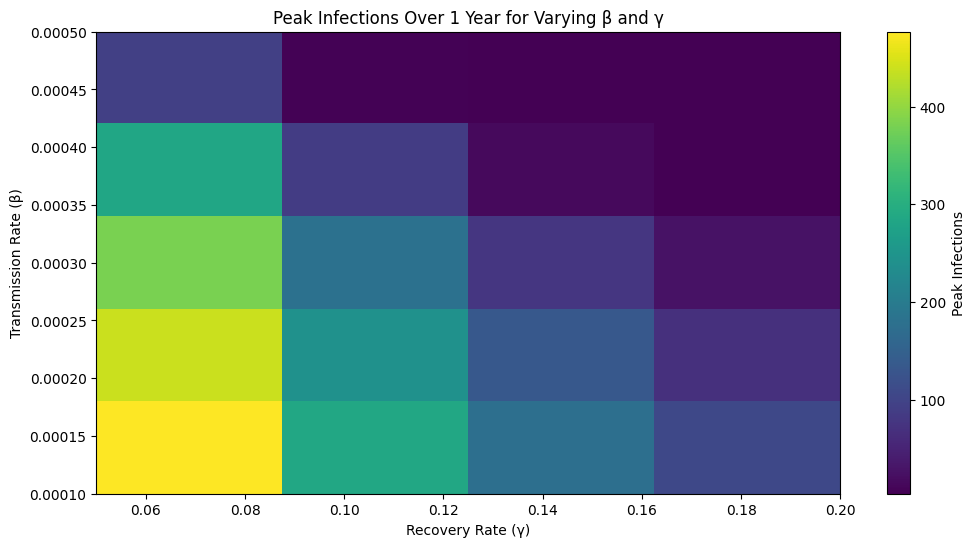

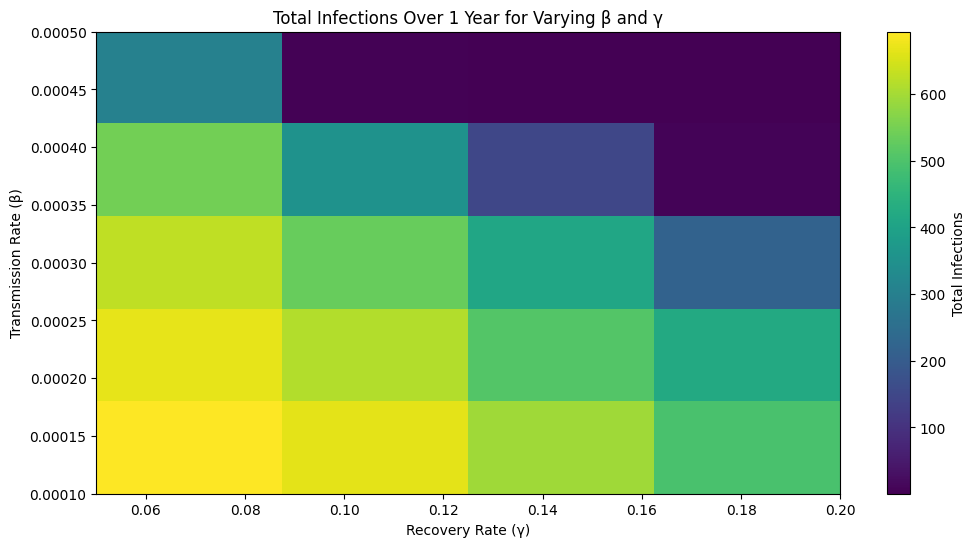

In [11]:
# Sensitivity analysis for SEIR model with varying beta and gamma values
beta_values = np.linspace(0.1e-3, 0.5e-3, 5)  # Range of beta values
gamma_values = np.linspace(0.05, 0.2, 4)      # Range of gamma values
t_sensitivity = np.linspace(0, 365, 365)      # Time period for 1 year

# Storage for peak infections and total infections
peak_infections = np.zeros((len(beta_values), len(gamma_values)))
total_infections = np.zeros((len(beta_values), len(gamma_values)))

# Run simulations for each combination of beta and gamma
for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        # Solve SEIR model for given beta and gamma
        solution_sensitivity = odeint(seir_model, initial_conditions, t_sensitivity, args=(beta, gamma, sigma, mu, N))
        S_sensitivity, E_sensitivity, I_sensitivity, R_sensitivity = solution_sensitivity.T

        # Calculate peak infection and total infections over the year
        peak_infections[i, j] = max(I_sensitivity)
        total_infections[i, j] = R_sensitivity[-1]  # Total recovered by the end of the year represents total infections

# Plot peak infections heatmap
plt.figure(figsize=(12, 6))
plt.imshow(peak_infections, aspect='auto', cmap='viridis', extent=[gamma_values[0], gamma_values[-1], beta_values[0], beta_values[-1]])
plt.colorbar(label="Peak Infections")
plt.xlabel("Recovery Rate (γ)")
plt.ylabel("Transmission Rate (β)")
plt.title("Peak Infections Over 1 Year for Varying β and γ")
plt.show()

# Plot total infections heatmap
plt.figure(figsize=(12, 6))
plt.imshow(total_infections, aspect='auto', cmap='viridis', extent=[gamma_values[0], gamma_values[-1], beta_values[0], beta_values[-1]])
plt.colorbar(label="Total Infections")
plt.xlabel("Recovery Rate (γ)")
plt.ylabel("Transmission Rate (β)")
plt.title("Total Infections Over 1 Year for Varying β and γ")
plt.show()

    Impact of Transmission Rate (β):
        Higher values of β result in a larger peak in infections, as shown in the heatmaps. This indicates faster disease spread due to increased transmission probability.
        Public Health Intervention: To lower β, social distancing, masking, hygiene practices, and limiting large gatherings are effective. By reducing β, public health strategies can flatten the curve, preventing healthcare systems from becoming overwhelmed.

    Impact of Recovery Rate (γ):
        Higher values of γ (indicating faster recovery) result in lower peak infections and a reduction in the total number of infections over time. This reduces the duration of individual infectious periods, limiting further transmission.
        Public Health Intervention: Medical treatments, antiviral medications, and vaccination (if available) can help to increase γ by shortening the recovery time. These interventions reduce the spread and overall burden of the infection.

This analysis underscores how controlling β and γ through various public health measures and medical interventions can significantly influence the spread, peak, and duration of an epidemic.